In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dataset1 = pd.read_csv('dataset1.csv')
dataset2 = pd.read_csv('dataset2.csv')
dataset3 = pd.read_csv('dataset3.csv')


print(dataset1.head())
print(dataset2.head())
print(dataset3.head())



        ID  gender  minority  deprived
0  1087360       0         0         0
1  1088938       0         1         0
2  1088953       0         1         0
3  1088961       0         1         0
4  1089147       0         1         0
        ID  C_we  C_wk  G_we  G_wk  S_we  S_wk  T_we  T_wk
0  1000002   0.5   0.5   0.0   0.0   1.0   0.5   1.0   0.5
1  1000003   1.0   0.5   0.0   0.0   2.0   2.0   3.0   2.0
2  1000004   3.0   1.0   2.0   0.0   3.0   2.0   3.0   2.0
3  1000005   4.0   2.0   0.0   0.0   4.0   3.0   7.0   5.0
4  1000006   1.0   0.5   0.0   0.0   2.0   2.0   1.0   0.5
        ID  Optm  Usef  Relx  Intp  Engs  Dealpr  Thcklr  Goodme  Clsep  Conf  \
0  1087360     5     3     2     1     3       5       4       1      5     2   
1  1094049     2     3     3     2     3       1       2       1      5     1   
2  1094067     4     3     4     4     4       4       4       3      4     4   
3  1097484     3     3     3     3     3       3       3       3      3     3   
4  1102

Descriptive Statistics for Screen Time


In [2]:

screen_time_cols = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']
screen_time_stats = dataset2[screen_time_cols].describe()

# Display summary statistics
print("Screen Time Statistics:")
print(screen_time_stats)


Screen Time Statistics:
                C_we           C_wk           G_we           G_wk  \
count  113359.000000  113359.000000  113359.000000  113359.000000   
mean        2.188887       1.768854       1.739130       1.013082   
std         2.077960       1.734970       2.168335       1.554592   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.500000       0.500000       0.000000       0.000000   
50%         2.000000       1.000000       0.500000       0.000000   
75%         3.000000       3.000000       3.000000       2.000000   
max         7.000000       7.000000       7.000000       7.000000   

                S_we           S_wk           T_we           T_wk  
count  113359.000000  113359.000000  113359.000000  113359.000000  
mean        3.517004       2.910656       3.650932       2.567688  
std         2.497139       2.339170       1.954105       1.696659  
min         0.000000       0.000000       0.000000       0.000000  
25%         1.

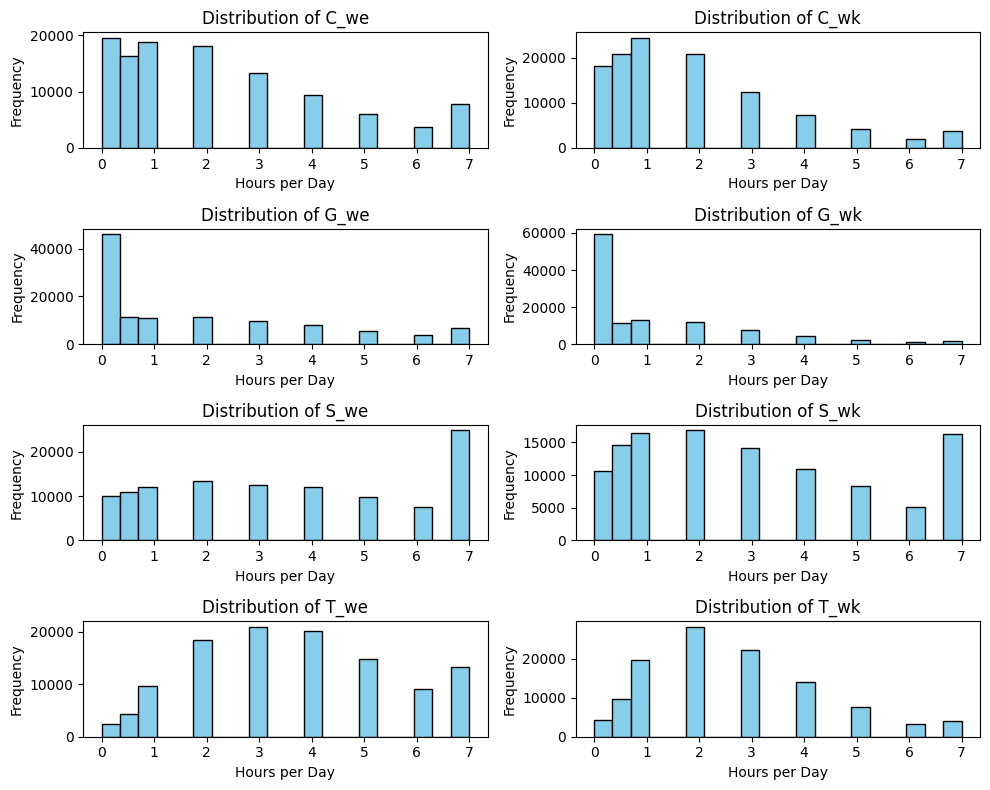

In [3]:
# Create histograms for screen time during weekdays and weekends
plt.figure(figsize=(10, 8))
for i, col in enumerate(screen_time_cols):
    plt.subplot(4, 2, i+1)
    plt.hist(dataset2[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel('Hours per Day')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [5]:
# Descriptive statistics for well-being indicators in dataset3 (Optm, Usef, etc.)
wellbeing_cols = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']
wellbeing_stats = dataset3[wellbeing_cols].describe()

# Display summary statistics
print("Well-being Statistics:")
print(wellbeing_stats)


Well-being Statistics:
                Optm           Usef           Relx           Intp  \
count  102580.000000  102580.000000  102580.000000  102580.000000   
mean        3.276087       3.107428       3.097826       3.272314   
std         0.997897       0.953128       1.015441       1.018537   
min         1.000000       1.000000       1.000000       1.000000   
25%         3.000000       3.000000       2.000000       3.000000   
50%         3.000000       3.000000       3.000000       3.000000   
75%         4.000000       4.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                Engs         Dealpr         Goodme          Clsep  \
count  102580.000000  102580.000000  102580.000000  102580.000000   
mean        3.048050       3.369448       3.273250       3.557116   
std         1.076483       1.049365       1.126084       1.031297   
min         1.000000       1.000000       1.000000       1.000000   
25%       

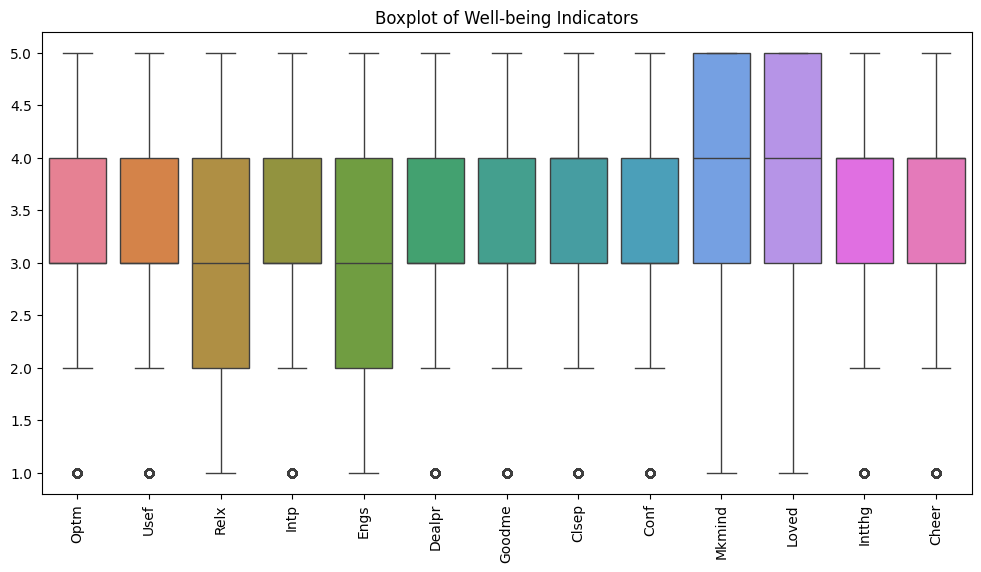

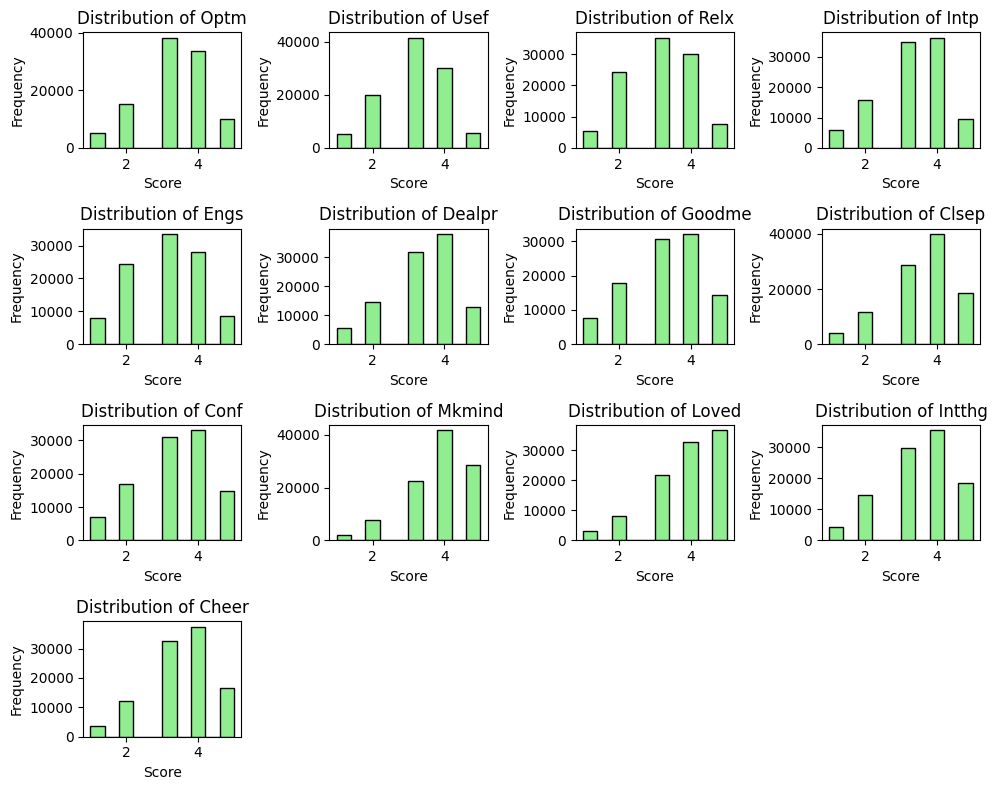

In [6]:
# Create boxplots for well-being indicators
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset3[wellbeing_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Well-being Indicators")
plt.show()

# Create histograms for well-being indicators
plt.figure(figsize=(10, 8))
for i, col in enumerate(wellbeing_cols):
    plt.subplot(4, 4, i+1)
    plt.hist(dataset3[col], bins=10, color='lightgreen', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel('Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


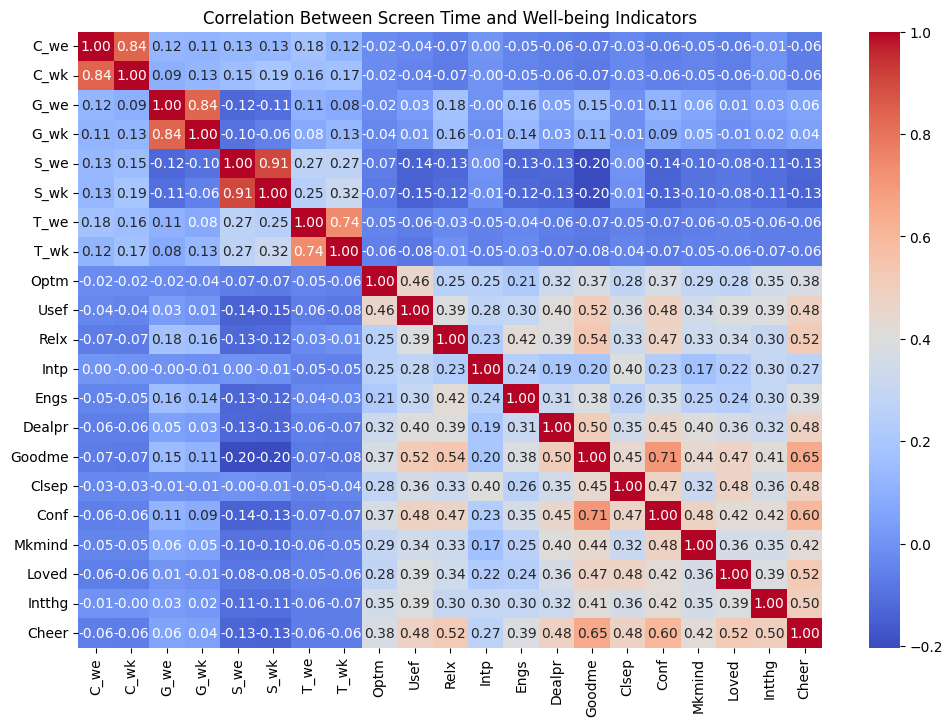

In [7]:
# Merge dataset2 and dataset3 on the 'ID' column for further analysis
merged_data = pd.merge(dataset2, dataset3, on='ID')

# Compute correlation matrix between screen time and well-being indicators
correlation_matrix = merged_data[screen_time_cols + wellbeing_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Screen Time and Well-being Indicators")
plt.show()




### Conclusion Based on the Descriptive Statistical Analysis:

1. **Screen Time Patterns**:
   - The descriptive statistics reveal significant variation in daily screen time, with higher usage during weekends (`C_we`, `G_we`, `S_we`, `T_we`) compared to weekdays (`C_wk`, `G_wk`, `S_wk`, `T_wk`). Computer usage shows strong correlation between weekdays and weekends (`0.84`), suggesting consistent habits.
   - Smartphone usage (`S_we` and `S_wk`) is more highly correlated with TV watching than other activities, particularly on weekends, indicating a possible preference for passive screen time.

2. **Well-being Indicators**:
   - The well-being indicators such as **optimism**, **feeling useful**, and **feeling relaxed** show varying levels of correlation with different screen time types. For instance, gaming during weekends (`G_we`) is mildly correlated with positive well-being indicators like **feeling good about oneself** (`0.15`) and **feeling confident** (`0.11`).
   - Interestingly, smartphone usage is more negatively correlated with well-being. Higher smartphone use on weekends (`S_we`) correlates negatively with optimism (`-0.07`), feeling useful (`-0.14`), and feeling good about oneself (`-0.20`).

3. **Correlation Insights**:
   - **Computer usage** shows mild negative correlations with most well-being indicators, suggesting that excessive computer use could be associated with lower well-being.
   - **Gaming** shows mixed results, with mild positive correlations to energy levels (`Engs`), problem-solving (`Dealpr`), and feeling good about oneself (`Goodme`), especially during weekends. However, these correlations are still weak.
   - **Smartphone usage** exhibits the strongest negative correlations among all screen time variables, particularly on weekends, hinting at a more adverse impact on well-being, including indicators such as confidence and feeling loved.

These results suggest that while moderate screen time, particularly gaming, may not heavily impact well-being, excessive smartphone use correlates with lower well-being indicators, especially during weekends.

**Inferential** **Statistical** **Analysis**

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Merge datasets based on 'ID'
merged_data = pd.merge(dataset2, dataset3, on='ID')


In [10]:
# Define threshold for high vs. low screen time (let's use median as the threshold)
median_s_we = merged_data['S_we'].median()

# Create two groups based on smartphone use during weekends
high_screen_time = merged_data[merged_data['S_we'] > median_s_we]
low_screen_time = merged_data[merged_data['S_we'] <= median_s_we]

# Display size of each group
print(f"High screen time group size: {len(high_screen_time)}")
print(f"Low screen time group size: {len(low_screen_time)}")


High screen time group size: 46768
Low screen time group size: 51510


In [11]:
# Well-being indicators to test
wellbeing_cols = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

# Perform t-test for each well-being indicator
t_test_results = {}
for col in wellbeing_cols:
    t_stat, p_value = stats.ttest_ind(high_screen_time[col], low_screen_time[col], nan_policy='omit')
    t_test_results[col] = {'t_stat': t_stat, 'p_value': p_value}

# Convert the results into a DataFrame for easy viewing
t_test_df = pd.DataFrame(t_test_results).T
t_test_df['significant'] = t_test_df['p_value'] < 0.05  # Mark significant results
print(t_test_df)


           t_stat        p_value  significant
Optm   -19.564234   4.534307e-85         True
Usef   -39.941374   0.000000e+00         True
Relx   -36.385273  6.082176e-288         True
Intp    -0.690043   4.901688e-01        False
Engs   -35.947182  3.800776e-281         True
Dealpr -36.717411  3.788909e-293         True
Thcklr -57.085721   0.000000e+00         True
Goodme -58.546689   0.000000e+00         True
Clsep   -1.990980   4.648582e-02         True
Conf   -39.540846   0.000000e+00         True
Mkmind -28.566607  9.457584e-179         True
Loved  -23.497773  9.333867e-122         True
Intthg -29.970418  1.842523e-196         True
Cheer  -37.523772  5.616032e-306         True


<ipython-input-12-2ec51d5a860f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_data['S_we'] > median_s_we, y=merged_data['Optm'], palette='Set2')


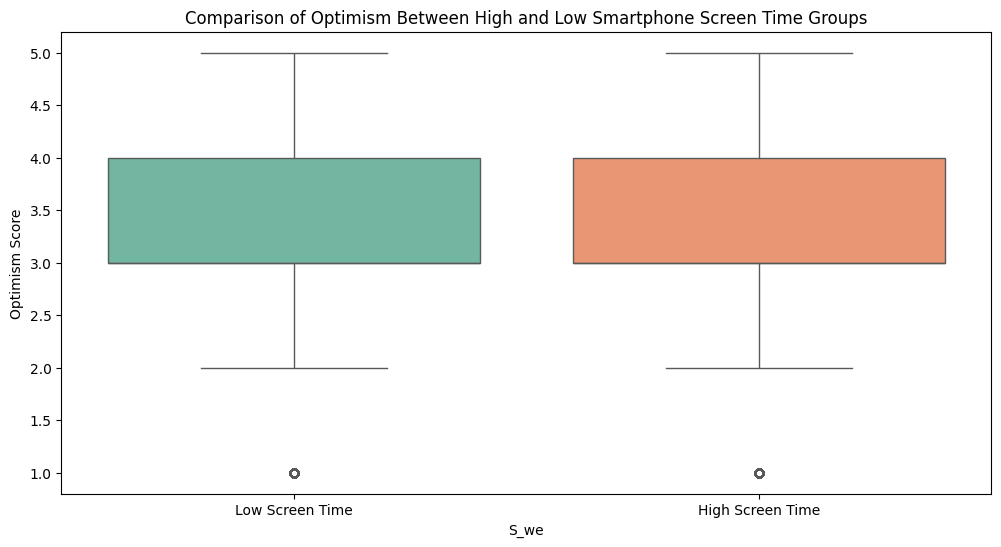

In [12]:
# Visualize the differences using box plots for a selected well-being indicator
plt.figure(figsize=(12, 6))

# Plot for the 'Optm' (Optimism) indicator
sns.boxplot(x=merged_data['S_we'] > median_s_we, y=merged_data['Optm'], palette='Set2')
plt.xticks([0, 1], ['Low Screen Time', 'High Screen Time'])
plt.title('Comparison of Optimism Between High and Low Smartphone Screen Time Groups')
plt.ylabel('Optimism Score')
plt.show()


<ipython-input-13-2ec51d5a860f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_data['S_we'] > median_s_we, y=merged_data['Optm'], palette='Set2')


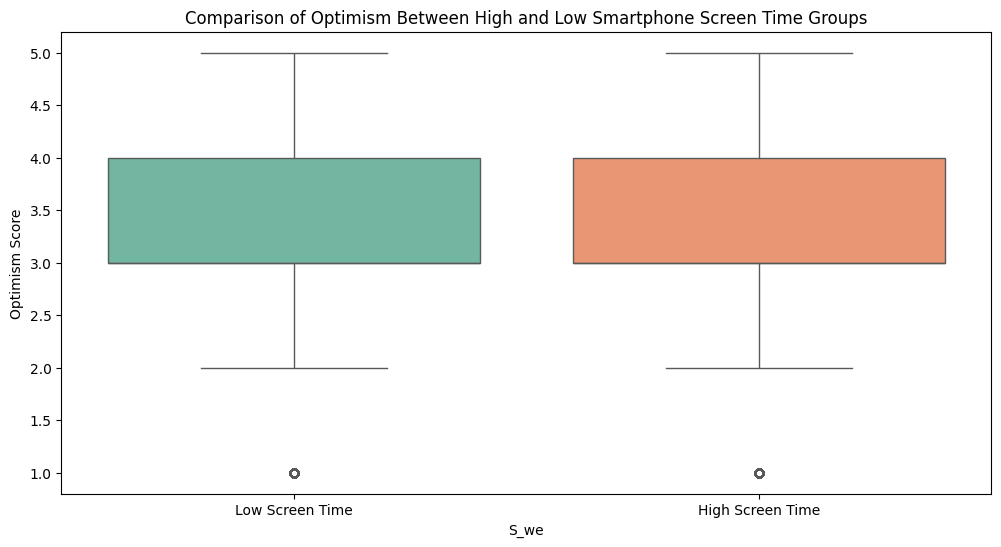

In [13]:
# Visualize the differences using box plots for a selected well-being indicator
plt.figure(figsize=(12, 6))

# Plot for the 'Optm' (Optimism) indicator
sns.boxplot(x=merged_data['S_we'] > median_s_we, y=merged_data['Optm'], palette='Set2')
plt.xticks([0, 1], ['Low Screen Time', 'High Screen Time'])
plt.title('Comparison of Optimism Between High and Low Smartphone Screen Time Groups')
plt.ylabel('Optimism Score')
plt.show()


### Conclusion Based on Inferential Statistical Analysis:

The results of the independent t-tests reveal significant differences in well-being scores between the **high smartphone screen time** and **low smartphone screen time** groups for most well-being indicators:

1. **Significant Differences**:
   - Respondents with higher smartphone screen time during weekends scored significantly **lower** on well-being indicators such as **optimism (Optm)**, **feeling useful (Usef)**, **feeling relaxed (Relx)**, **energy levels (Engs)**, **problem-solving (Dealpr)**, and **feeling good about themselves (Goodme)**.
   - These results indicate that increased smartphone usage is associated with **worse self-reported well-being** across many dimensions, with p-values close to zero, indicating extremely strong statistical significance.

2. **Non-Significant Results**:
   - Interestingly, the indicator **"interest in other people (Intp)"** showed no significant difference between high and low screen time groups (p-value = 0.49), suggesting that smartphone screen time may not impact social interest as much as other well-being factors.

3. **Key Findings**:
   - The most pronounced effects are seen in the indicators for **thinking clearly (Thcklr)**, **feeling good about oneself (Goodme)**, and **feeling confident (Conf)**, all of which show very strong negative associations with high smartphone usage.

### Conclusion:
Higher smartphone usage during weekends is associated with **significantly lower well-being** in areas like optimism, energy, problem-solving, and self-confidence. Reducing smartphone screen time could potentially lead to improvements in these aspects of well-being among adolescents.